##  📓 Practice Exercises for generated_his_system_metrics.csv

###  📘 Section A — Basic EDA


### 1. Inspecting Data Structure

In [3]:
import pandas as pd

# Load dataset
df = pd.read_csv("generated_his_system_metrics.csv")

# 1. Basic properties
df.info()

# Missing values per column
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   system_id                    500 non-null    int64  
 1   sensor_latency_ms            500 non-null    float64
 2   cpu_usage_percent            500 non-null    float64
 3   memory_usage_mb              500 non-null    float64
 4   error_count                  500 non-null    int64  
 5   uptime_hours                 500 non-null    float64
 6   mode                         500 non-null    object 
 7   temperature_sensor           500 non-null    float64
 8   CPU_temperature              500 non-null    float64
 9   CPU_thermostat_stability     500 non-null    float64
 10  sensor_thermostat_stability  500 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 43.1+ KB


system_id                      0
sensor_latency_ms              0
cpu_usage_percent              0
memory_usage_mb                0
error_count                    0
uptime_hours                   0
mode                           0
temperature_sensor             0
CPU_temperature                0
CPU_thermostat_stability       0
sensor_thermostat_stability    0
dtype: int64

In [14]:
df.head()

,system_id,sensor_latency_ms,cpu_usage_percent,memory_usage_mb,error_count,uptime_hours,mode,temperature_sensor,CPU_temperature,CPU_thermostat_stability,sensor_thermostat_stability
0,1,22.483571,58.892663,420.457194,0,130.837373,normal,26.146247,50.9,956.574776,111.788151
1,2,19.308678,73.641250,316.802495,0,48.285983,normal,56.447908,59.1,1039.893818,87.168360
2,3,23.238443,24.021486,174.484049,1,92.523906,normal,57.172326,48.8,1011.319140,83.611087
3,4,27.615149,53.444539,96.321615,0,63.130883,emergency,28.567063,42.7,939.748211,103.078886
4,5,18.829233,35.240361,311.006058,2,47.978239,normal,31.508234,46.8,976.855990,113.168138


### 2. Summary Statistics


In [11]:
#df.head()

df[['cpu_usage_percent','memory_usage_mb','sensor_latency_ms']].describe()


,cpu_usage_percent,memory_usage_mb,sensor_latency_ms
count,500.000000,500.000000,500.000000
mean,45.477392,207.990699,20.034190
std,14.669958,141.869183,4.906266
min,4.546700,4.591898,3.793663
25%,36.070624,99.706662,16.498463
50%,45.427974,173.237281,20.063986
75%,54.768634,280.858874,23.183916
max,84.485731,778.689043,39.263657


In [ ]:
# Write 1–2 sentences interpreting an interesting observation from the summary statistics.


## 📘 Section B — Visualizations

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


### 3. Time Series Plot (CPU Usage)

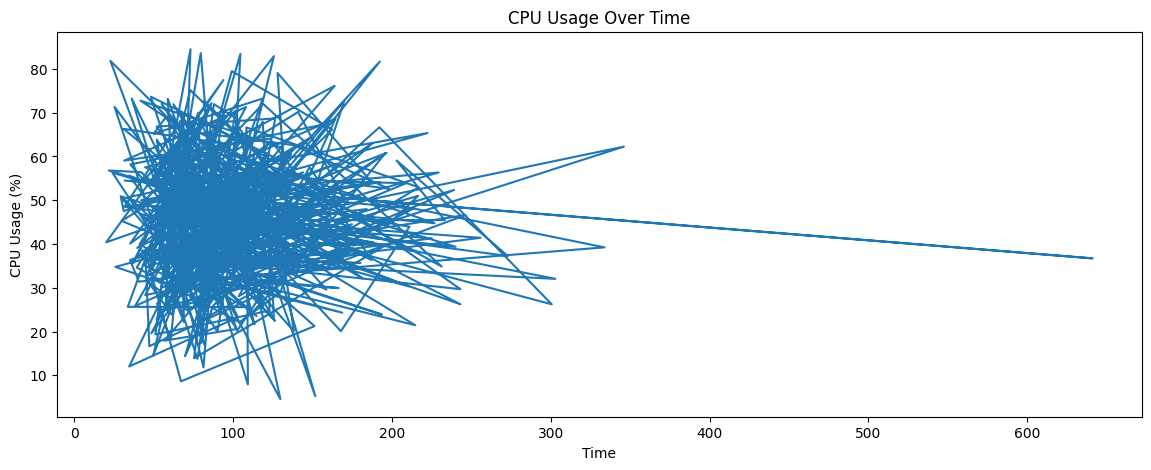

In [18]:
plt.figure(figsize=(14,5))
plt.plot(df['uptime_hours'], df['cpu_usage_percent'])
plt.title("CPU Usage Over Time")
plt.xlabel("Time")
plt.ylabel("CPU Usage (%)")
plt.show()

# Identify intervals > 85%
high_cpu = df[df['cpu_usage_percent'] > 85]
#high_cpu.head()


### 4. Scatterplot — memory_usage_mb  vs  sensor_latency_ms

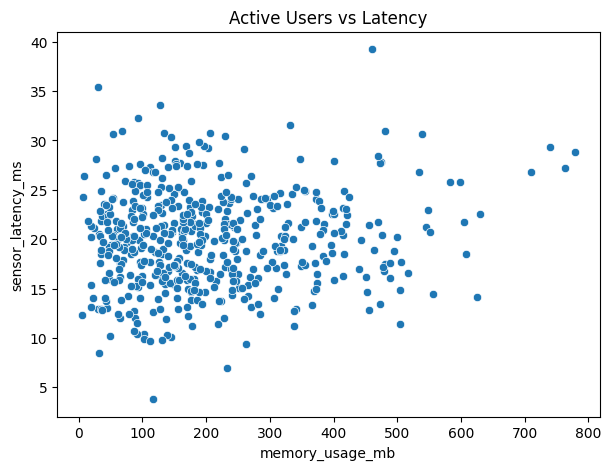

In [20]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="memory_usage_mb", y="sensor_latency_ms")
plt.title("memory_usage_mb  vs  Sensor Latency")
plt.show()


In [22]:
#Add a short written interpretation below the graph:



### 5. Correlation Heatmap

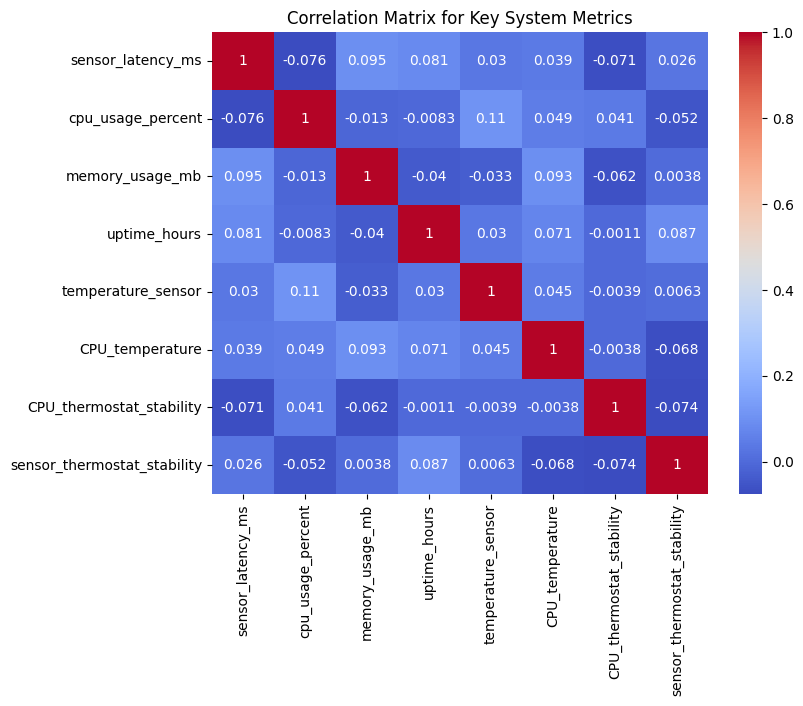

In [24]:
metrics = ['sensor_latency_ms',	'cpu_usage_percent', 'memory_usage_mb', 'uptime_hours', 
           'temperature_sensor', 'CPU_temperature', 'CPU_thermostat_stability', 'sensor_thermostat_stability']

plt.figure(figsize=(8,6))
sns.heatmap(df[metrics].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix for Key System Metrics")
plt.show()


In [ ]:
# Write which variables are most correlated:

'when cpu_usage_percent is more and other hand compare to temperature_sensor, it is also high. almost 11% usage'
'and same value can be seen in temperature_sensor to cpu_usage_percent in 11% increase  '

## 📘 Section C — Grouping, Filtering, Anomaly Detection
### 6. Peak Load Analysis

In [31]:
peak = df[(df['sensor_latency_ms'] > 30) & (df['cpu_usage_percent'] > 5)]
len(peak)


13

### 7. Outlier Detection for Latency (IQR)

In [34]:
Q1 = df['sensor_latency_ms'].quantile(0.25)
Q3 = df['sensor_latency_ms'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df['sensor_latency_ms'] < lower) | (df['sensor_latency_ms'] > upper)]

lower, upper, len(outliers)


(6.470283038191823, 33.21209621016327, 4)

### 8. Daily temperature_sensor	and CPU_temperature	 Load

In [37]:
df['uptime_hours'] = pd.to_datetime(df['uptime_hours'])
df['date'] = df['uptime_hours'].dt.date

daily = df.groupby('date')[['temperature_sensor','CPU_temperature']].sum()
daily['total_network'] = daily['temperature_sensor'] + daily['CPU_temperature']

daily.sort_values("total_network", ascending=False).head(1)


,temperature_sensor,CPU_temperature,total_network
date,,,
1970-01-01,22441.866894,24931.1,47372.966894


## 📘 Section D — Interpretive Questions
### 9. Performance Bottleneck (Short Answer)
Based on the pattern of high latency + normal CPU + high disk activity, the likely bottleneck is…

### 10. Early-Warning Indicator (Short Answer)

Write your answer:

The best leading indicator of high latency appears to be…